<img src="../logo/logo_text.png" />

# Application Example

### Install SARABANDE

In [11]:
# pip install sarabande==0.3.1

### Preamble

In [1]:
#Preamble
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.io.fits as pyf
import os
import sarabande

plt.style.use("light_mode") #custom matplotlib style sheet

### Data

In order to use SARABANDE on any data, we need to import our data. For this we will pull data from [CATS](https://www.mhdturbulence.com), an open source catalog of Magnetohydrodynamic (MHD) Turbulence simulations. This is currently stored in the `data` folder. We also subtract out the mean from the data set just so we can examine the fluctuations of the density field.

In [2]:
hdulist = pyf.open('../data/dens_t800.fits.gz')
data = hdulist[0].data.astype(np.float64)

data = data[:128,:128,:128] # for sake of fast computation
data -= np.mean(data)

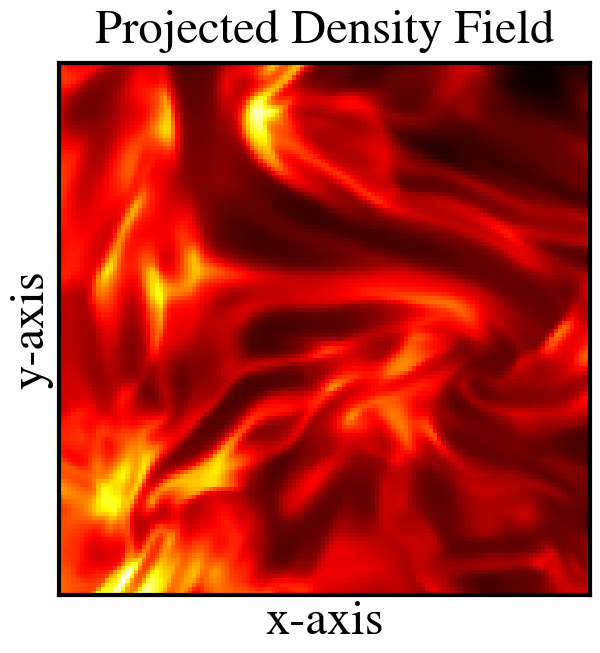

In [3]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,7))
im1 = ax1.imshow(data[:,:,64], cmap='hot', origin='lower')
# divider1 = axgrid.make_axes_locatable(ax1)
# cax1 = divider1.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im1, cax=cax1)
ax1.set_title("Projected Density Field", fontsize=35, pad=15)
ax1.set_xlabel("x-axis", fontsize=35)
ax1.set_ylabel("y-axis", fontsize=35)
ax1.set_xticks([])
ax1.set_yticks([])
fig.tight_layout()
# plt.savefig("projected-example.png", dpi=300)
plt.show()

From here we can apply SARABANDE to the density field.

## Full

### Full 3PCF

In [5]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
_3PCF = sarabande.measure(nPCF=3, projected=False, density_field_data = data,
                          save_dir=save_dir, save_name='example', nbins=10, ell_max=0,
                          physical_boxsize=128, rmin=1e-14, rmax=64, normalize=True)

sarabande.calc_zeta(_3PCF, verbose_flag=False)

Preparing the data:

3PCF took 4.1540 seconds to finish


Now we can plot the results:

In [6]:
np.shape(_3PCF.zeta.real) # (l_max + 1, nbins, nbins)

(1, 10, 10)

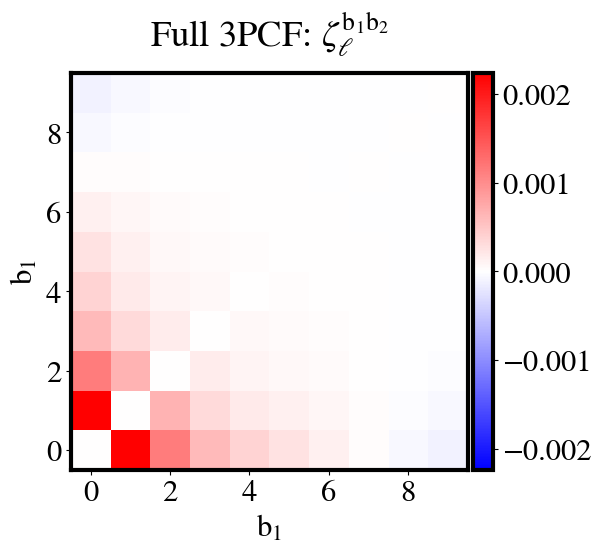

In [7]:
img = _3PCF.zeta[0,:,:].real

fig, (ax1) = plt.subplots(1,1, figsize=(8,6))
im1 = ax1.imshow(img, origin='lower', 
                 vmax = np.max(np.abs(img)), vmin = -np.max(np.abs(img)), 
                 cmap="bwr")
ax1.set_title("Full 3PCF: $\\zeta^{\mathrm{b}_1 \mathrm{b}_2}_{\\ell}$", pad = 20)
ax1.set_xlabel("$\mathrm{b}_1$")
ax1.set_ylabel("$\mathrm{b}_1$")
ax1.set_xticks(range(0,10,2))
ax1.set_yticks(range(0,10,2))

#colorbar
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)

fig.tight_layout()
plt.show()

### Full 4PCF

we can also calculate the full 4PCF

In [4]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
_4PCF = sarabande.measure(nPCF=4, projected=False,
                          density_field_data = data, save_dir=save_dir,
                          save_name='example', nbins=10, ell_max=0,
                          physical_boxsize=128, rmin=1e-14, rmax=64, normalize=True)

sarabande.calc_zeta(_4PCF, verbose_flag=False)

Preparing the data:
Finished Calculating 4PCF in 7.0824 seconds


In [5]:
np.shape(_4PCF.zeta.real) # (l_max + 1,l_max + 1, l_max + 1, nbins, nbins, nbins)

(1, 1, 1, 10, 10, 10)

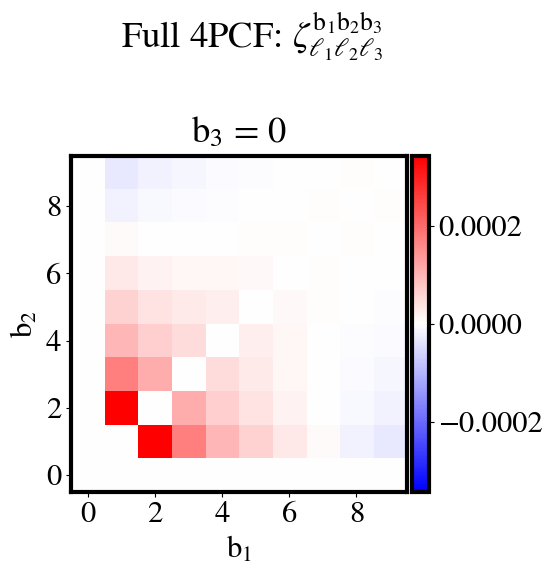

In [6]:
ells = '000'
l_1, l_2, l_3 = int(ells[0]),int(ells[1]),int(ells[2])
b_3 = 0

img = _4PCF.zeta[l_1, l_2, l_3, :, :, b_3].real

f, ax1 = plt.subplots(1,1, figsize=(8,6))

ells_string = '$\\ell_1, \ell_2, \ell_3 = $' + ells[0] + ',' + ells[1] + ',' + ells[2]
f.suptitle('Full 4PCF: $\\zeta^{\mathrm{b}_1 \mathrm{b}_2 \mathrm{b}_3}_{\ell_1 \ell_2 \ell_3}$', x = 0.475)

im1 = ax1.imshow(img, origin='lower', cmap='bwr')
max_1, min_1 = np.max(img), np.min(img)
im1.set_clim(-max_1, max_1)
ax1.set_title('$\mathrm{b}_3$ = ' + str(b_3), pad = 10)
ax1.set_xlabel("$\mathrm{b}_1$")
ax1.set_ylabel("$\mathrm{b}_2$")
ax1.set_xticks(range(0,10,2))
ax1.set_yticks(range(0,10,2))

#colorbar
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
f.tight_layout()

## Projected

### Projected 3PCF

In [11]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
projected_3PCF = sarabande.measure(nPCF=3, projected=True, m_max=5,
                                   density_field_data = data[:,:,64],
                                   save_dir=save_dir, save_name='example',
                                   nbins=20, physical_boxsize=128, rmin=1e-14, rmax=64,
                                   normalize=True)

sarabande.calc_zeta(projected_3PCF, verbose_flag=False)

Preparing the data:

Finished Calculating the Projected 3PCF in 0.6507 seconds


In [12]:
np.shape(projected_3PCF.zeta) # (m_max + 1, nbins, nbins)

(6, 20, 20)

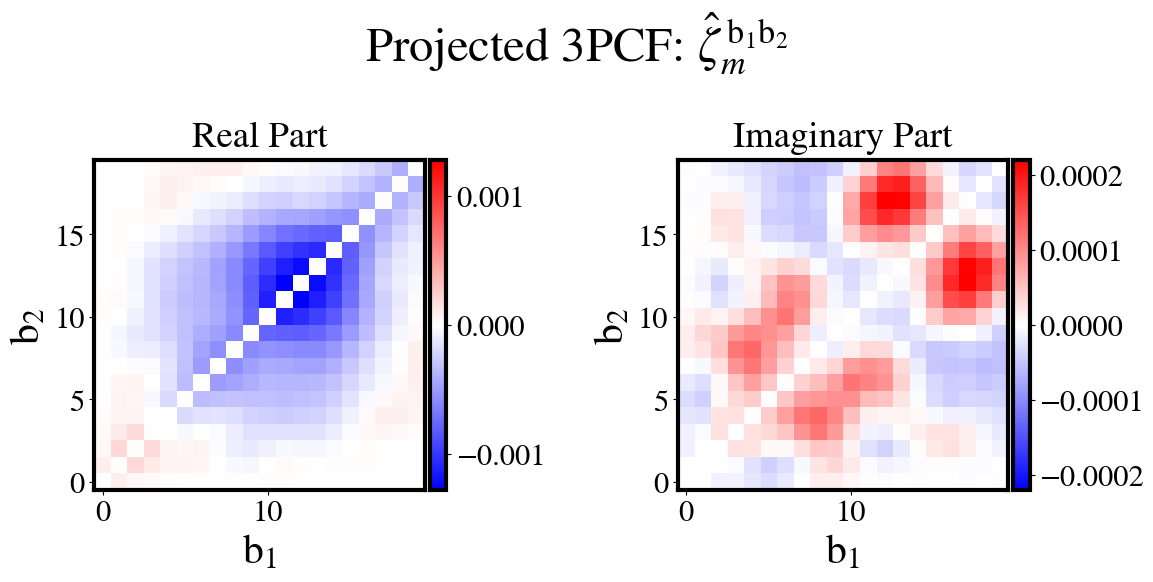

In [13]:
m = 3
img = projected_3PCF.zeta[m, :,:]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

# Real Part (left)
im1 = ax1.imshow(img.real, origin='lower', cmap='bwr',vmin= -np.max(np.abs(img.real)),vmax= np.max(np.abs(img.real)))
ax1.set_title("Real Part", pad = 10)
ax1.set_xlabel("$\mathrm{b}_1$", fontsize=30)
ax1.set_ylabel("$\mathrm{b}_2$", fontsize=30)
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)

# Imaginary Part (right)
im2 = ax2.imshow(img.imag, origin='lower', cmap='bwr',vmin= -np.max(np.abs(img.imag)),vmax= np.max(np.abs(img.imag)))
ax2.set_title("Imaginary Part", pad = 10)
ax2.set_xlabel("$\mathrm{b}_1$", fontsize=30)
ax2.set_ylabel("$\mathrm{b}_2$", fontsize=30)
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)

fig.suptitle("Projected 3PCF: $\\hat{\\zeta}^{\; \\mathrm{b}_1 \\mathrm{b}_2}_m$", fontsize=35)
fig.tight_layout()
plt.show()

### Projected 4PCF

In [14]:
#string to directory to save data into
save_dir = os.getcwd() + '/output/'

#create measure_obj
projected_4PCF = sarabande.measure(nPCF=4, projected=True, m_max=5,
                                   density_field_data = data[:,:,64],
                                   save_dir=save_dir, save_name='example',
                                   nbins=20, physical_boxsize=128, rmin=1e-14, rmax=64,
                                   normalize=True)

sarabande.calc_zeta(projected_4PCF, verbose_flag=False)

Preparing the data:

Finished Calculating the Projected 4PCF in 49.0621 seconds


In [15]:
np.shape(projected_4PCF.zeta) # (2 * m_max, 2 * m_max, nbins, nbins, nbins)

(10, 10, 20, 20, 20)

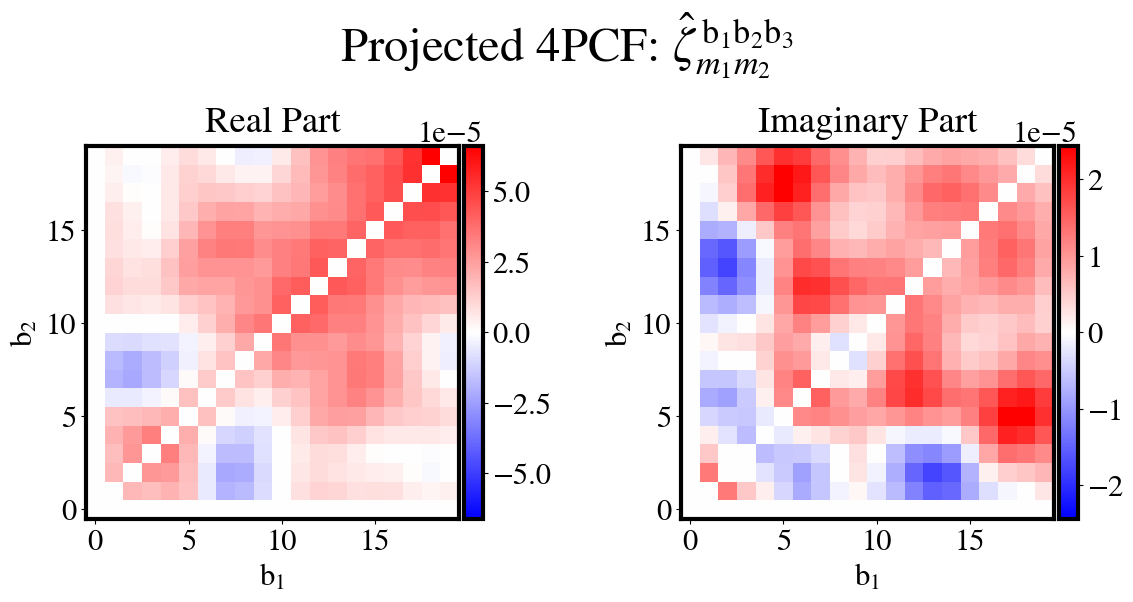

In [16]:
m1,m2 = 2,2
b3 = 0

img = projected_4PCF.zeta[m1,m2,:,:,b3]


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

im1 = ax1.imshow(img.real, origin='lower', cmap='bwr',vmin= -np.max(np.abs(img.real)),vmax= np.max(np.abs(img.real)))
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
ax1.set_title("Real Part", pad = 10)
ax1.set_xlabel("$\mathrm{b}_1$")
ax1.set_ylabel("$\mathrm{b}_2$")

im2 = ax2.imshow(img.imag, origin='lower', cmap='bwr',vmin= -np.max(np.abs(img.imag)),vmax= np.max(np.abs(img.imag)))
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
ax2.set_title("Imaginary Part", pad = 10)
ax2.set_xlabel("$\mathrm{b}_1$")
ax2.set_ylabel("$\mathrm{b}_2$")

fig.suptitle("Projected 4PCF: $\\hat{\\zeta}^{\; \mathrm{b}_1 \mathrm{b}_2 \mathrm{b}_3}_{m_1 m_2}$",
             fontsize = 35)
fig.tight_layout()
plt.show()